## About Data
This dataset contains emotions expressed through text and the emotions included in the data are ["joy","sadness","anger","fear","love","surprise"].

The emotions-dataset-for-nlp contains train.txt, test.txt & val.txt for training, testing and validation purposes seperately. The text files consist of text descriptions and its corresponding label which are seperated by semicolon(;).

In [8]:
import os # accessing directory structure
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
%matplotlib inline

In [135]:
# import libraries
from nltk.tokenize import word_tokenize , sent_tokenize
from sklearn.pipeline import Pipeline , FeatureUnion
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier ,BaggingClassifier ,ExtraTreesClassifier
from sklearn.model_selection import train_test_split,  GridSearchCV 
from sklearn.metrics import classification_report ,confusion_matrix , accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
import pickle

[nltk_data] Downloading package punkt to C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
path = 'emotions-dataset-for-nlp'
files = os.listdir(path)
for f in files:
    print(f)

hypertuningNLP
test.txt
train.txt
val.txt


In [3]:
test_data = pd.read_csv(path+"/test.txt", header=None, sep=";", names=["Comment","Emotion"], encoding="utf-8")
train_data = pd.read_csv(path+"/train.txt", header=None, sep=";", names=["Comment","Emotion"], encoding="utf-8")
validation_data = pd.read_csv(path+"/val.txt", header=None, sep=";", names=["Comment","Emotion"], encoding="utf-8")

In [4]:
print("Train : ", train_data.shape)
print("Test : ", test_data.shape)
print("Validation : ", validation_data.shape)

Train :  (16000, 2)
Test :  (2000, 2)
Validation :  (2000, 2)


## Data Understanding
describe_data function will help us understand each dataset

In [6]:
def describe_data(data_type,data,label):
    print(data_type," DESCRIPTION")
    print("--------------------------")
    size=data.shape
    null_values=data.isnull().sum().sum()
    
    label_count=data[label].value_counts()
    print(data_type," shape:",size,"\n")
    print(data_type," contains:",null_values," null values\n")
    print("Label counts:")  
    print(label_count)
    print()
    
    print("*****",data_type," label count plot ****")
    sns.countplot(
        data=data,
        x=label
    )

Training Data  DESCRIPTION
--------------------------
Training Data  shape: (16000, 2) 

Training Data  contains: 0  null values

Label counts:
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64

***** Training Data  label count plot ****


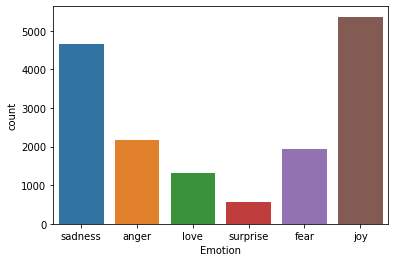

In [9]:
describe_data("Training Data",train_data,"Emotion")

Testing Data  DESCRIPTION
--------------------------
Testing Data  shape: (2000, 2) 

Testing Data  contains: 0  null values

Label counts:
joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: Emotion, dtype: int64

***** Testing Data  label count plot ****


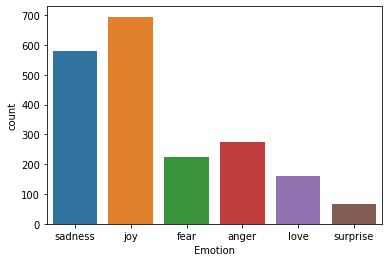

In [10]:
describe_data("Testing Data",test_data,"Emotion")

Validation Data  DESCRIPTION
--------------------------
Validation Data  shape: (2000, 2) 

Validation Data  contains: 0  null values

Label counts:
joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: Emotion, dtype: int64

***** Validation Data  label count plot ****


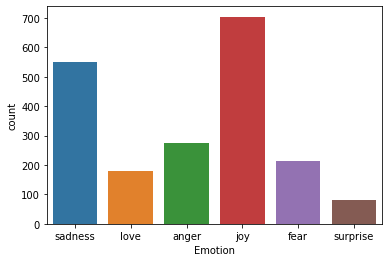

In [11]:
describe_data("Validation Data",validation_data,"Emotion")

All the dataset are free of null values. The test and validate data size are equal which is smaller than the traning data, which is obvious that more data is required in traning model than validating and testing model. The Distribution of joy and sadness labels are denser than any other labels in all dataset.

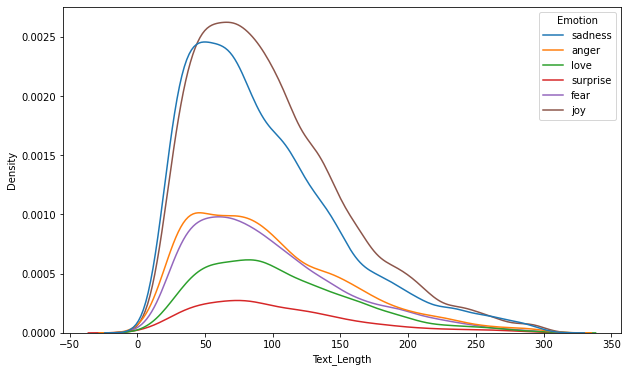

In [14]:
train_data["Text_Length"]=train_data["Comment"].apply(len)

fig=plt.figure(figsize=(10,6))

sns.kdeplot(
    x=train_data["Text_Length"],
    hue=train_data["Emotion"]
)
plt.show()

In [15]:
train_data["Text_Length"].max()

300

In [16]:
train_data["Text_Length"].min()

7

We have mininum Description length of 7 and maximum length of 300 however most of them are concentrated in between 1-150

In [18]:
train_data[["Text_Length"]].describe()

,Text_Length
count,16000.000000
mean,96.845812
std,55.904953
min,7.000000
25%,53.000000
50%,86.000000
75%,129.000000
max,300.000000


## Data Preparation
Before preparing text for the model wenoticed that data labels with object datatype. So to feed our data to the model it must be converted into machine understandable form. For that reason let I have label encoded the labels using the funcion "label_encode"

In [19]:
def label_encode(data,label):
    labels=data[label].map(
    {
        "joy":0,
        "sadness":1,
        "anger":2,
        "fear":3,
        "love":4,
        "surprise":5
    }
    )
    return labels

In [20]:
## Label encode in all the dataset

In [21]:
train_data["Label"]=label_encode(train_data,"Emotion")
validation_data["Label"]=label_encode(validation_data,"Emotion")
test_data["Label"]=label_encode(test_data,"Emotion")

In [22]:
train_data.head()

,Comment,Emotion,Text_Length,Label
0,i didnt feel humiliated,sadness,23,1
1,i can go from feeling so hopeless to so damned...,sadness,108,1
2,im grabbing a minute to post i feel greedy wrong,anger,48,2
3,i am ever feeling nostalgic about the fireplac...,love,92,4
4,i am feeling grouchy,anger,20,2


In [34]:
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(train_data.Label.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = [str(int(i)) for i in range(train_data["Label"].nunique())]) 
df = pd.concat([train_data, dfOneHot], axis=1)
#printing to verify 
print(df.head())

                                             Comment  Emotion  Text_Length  \
0                            i didnt feel humiliated  sadness           23   
1  i can go from feeling so hopeless to so damned...  sadness          108   
2   im grabbing a minute to post i feel greedy wrong    anger           48   
3  i am ever feeling nostalgic about the fireplac...     love           92   
4                               i am feeling grouchy    anger           20   

   Label    0    1    2    3    4    5  
0      1  0.0  1.0  0.0  0.0  0.0  0.0  
1      1  0.0  1.0  0.0  0.0  0.0  0.0  
2      2  0.0  0.0  1.0  0.0  0.0  0.0  
3      4  0.0  0.0  0.0  0.0  1.0  0.0  
4      2  0.0  0.0  1.0  0.0  0.0  0.0  


In [36]:
df.head(20)

,Comment,Emotion,Text_Length,Label,0,1,2,3,4,5
0,i didnt feel humiliated,sadness,23,1,0.0,1.0,0.0,0.0,0.0,0.0
1,i can go from feeling so hopeless to so damned...,sadness,108,1,0.0,1.0,0.0,0.0,0.0,0.0
2,im grabbing a minute to post i feel greedy wrong,anger,48,2,0.0,0.0,1.0,0.0,0.0,0.0
3,i am ever feeling nostalgic about the fireplac...,love,92,4,0.0,0.0,0.0,0.0,1.0,0.0
4,i am feeling grouchy,anger,20,2,0.0,0.0,1.0,0.0,0.0,0.0
5,ive been feeling a little burdened lately wasn...,sadness,65,1,0.0,1.0,0.0,0.0,0.0,0.0
6,ive been taking or milligrams or times recomme...,surprise,122,5,0.0,0.0,0.0,0.0,0.0,1.0
7,i feel as confused about life as a teenager or...,fear,73,3,0.0,0.0,0.0,1.0,0.0,0.0
8,i have been with petronas for years i feel tha...,joy,98,0,1.0,0.0,0.0,0.0,0.0,0.0
9,i feel romantic too,love,19,4,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
df.rename(columns={'0': 'joy', '1': 'sadness',"2":"anger","3":"fear","4":"love","5":"surprise"}, inplace=True)

In [38]:
df.head()

,Comment,Emotion,Text_Length,Label,joy,sadness,anger,fear,love,surprise
0,i didnt feel humiliated,sadness,23,1,0.0,1.0,0.0,0.0,0.0,0.0
1,i can go from feeling so hopeless to so damned...,sadness,108,1,0.0,1.0,0.0,0.0,0.0,0.0
2,im grabbing a minute to post i feel greedy wrong,anger,48,2,0.0,0.0,1.0,0.0,0.0,0.0
3,i am ever feeling nostalgic about the fireplac...,love,92,4,0.0,0.0,0.0,0.0,1.0,0.0
4,i am feeling grouchy,anger,20,2,0.0,0.0,1.0,0.0,0.0,0.0


In [39]:
df.drop(['Emotion'],axis=1,inplace=True)

In [40]:
df.drop(['Text_Length'],axis=1,inplace=True)

In [42]:
df.drop(['Label'],axis=1,inplace=True)

In [43]:
df.head()

,Comment,joy,sadness,anger,fear,love,surprise
0,i didnt feel humiliated,0.0,1.0,0.0,0.0,0.0,0.0
1,i can go from feeling so hopeless to so damned...,0.0,1.0,0.0,0.0,0.0,0.0
2,im grabbing a minute to post i feel greedy wrong,0.0,0.0,1.0,0.0,0.0,0.0
3,i am ever feeling nostalgic about the fireplac...,0.0,0.0,0.0,0.0,1.0,0.0
4,i am feeling grouchy,0.0,0.0,1.0,0.0,0.0,0.0


In [52]:
df2 = df[["joy","sadness","anger","fear","love","surprise"]].astype(int)

In [53]:
df2.head()

,joy,sadness,anger,fear,love,surprise
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [57]:
df3 = pd.concat([df["Comment"], df2], axis=1)

In [58]:
df3.head()

,Comment,joy,sadness,anger,fear,love,surprise
0,i didnt feel humiliated,0,1,0,0,0,0
1,i can go from feeling so hopeless to so damned...,0,1,0,0,0,0
2,im grabbing a minute to post i feel greedy wrong,0,0,1,0,0,0
3,i am ever feeling nostalgic about the fireplac...,0,0,0,0,1,0
4,i am feeling grouchy,0,0,1,0,0,0


In [60]:
df3.to_csv("emotion_train_data.csv")

In [61]:
test_data.head()

,Comment,Emotion,Label
0,im feeling rather rotten so im not very ambiti...,sadness,1
1,im updating my blog because i feel shitty,sadness,1
2,i never make her separate from me because i do...,sadness,1
3,i left with my bouquet of red and yellow tulip...,joy,0
4,i was feeling a little vain when i did this one,sadness,1


In [63]:
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(test_data.Label.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = [str(int(i)) for i in range(test_data["Label"].nunique())]) 
df_test = pd.concat([test_data, dfOneHot], axis=1)
#printing to verify 
df_test.head()

,Comment,Emotion,Label,0,1,2,3,4,5
0,im feeling rather rotten so im not very ambiti...,sadness,1,0.0,1.0,0.0,0.0,0.0,0.0
1,im updating my blog because i feel shitty,sadness,1,0.0,1.0,0.0,0.0,0.0,0.0
2,i never make her separate from me because i do...,sadness,1,0.0,1.0,0.0,0.0,0.0,0.0
3,i left with my bouquet of red and yellow tulip...,joy,0,1.0,0.0,0.0,0.0,0.0,0.0
4,i was feeling a little vain when i did this one,sadness,1,0.0,1.0,0.0,0.0,0.0,0.0


In [65]:
df_test.drop(['Emotion',"Label"],axis=1,inplace=True)

In [66]:
df_test.head()

,Comment,0,1,2,3,4,5
0,im feeling rather rotten so im not very ambiti...,0.0,1.0,0.0,0.0,0.0,0.0
1,im updating my blog because i feel shitty,0.0,1.0,0.0,0.0,0.0,0.0
2,i never make her separate from me because i do...,0.0,1.0,0.0,0.0,0.0,0.0
3,i left with my bouquet of red and yellow tulip...,1.0,0.0,0.0,0.0,0.0,0.0
4,i was feeling a little vain when i did this one,0.0,1.0,0.0,0.0,0.0,0.0


In [68]:
df_test.rename(columns={'0': 'joy', '1': 'sadness',"2":"anger","3":"fear","4":"love","5":"surprise"}, inplace=True)

In [69]:
df_test1 = df_test[["joy","sadness","anger","fear","love","surprise"]].astype(int)

In [70]:
df_test1.head()

,joy,sadness,anger,fear,love,surprise
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,1,0,0,0,0


In [71]:
df_test2 = pd.concat([df_test["Comment"], df_test1], axis=1)

In [72]:
df_test2.head()

,Comment,joy,sadness,anger,fear,love,surprise
0,im feeling rather rotten so im not very ambiti...,0,1,0,0,0,0
1,im updating my blog because i feel shitty,0,1,0,0,0,0
2,i never make her separate from me because i do...,0,1,0,0,0,0
3,i left with my bouquet of red and yellow tulip...,1,0,0,0,0,0
4,i was feeling a little vain when i did this one,0,1,0,0,0,0


In [73]:
df_test2.to_csv("emotion_test_data.csv")

In [74]:
validation_data.head()

,Comment,Emotion,Label
0,im feeling quite sad and sorry for myself but ...,sadness,1
1,i feel like i am still looking at a blank canv...,sadness,1
2,i feel like a faithful servant,love,4
3,i am just feeling cranky and blue,anger,2
4,i can have for a treat or if i am feeling festive,joy,0


In [75]:
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(validation_data.Label.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = [str(int(i)) for i in range(validation_data["Label"].nunique())]) 
df_val = pd.concat([validation_data, dfOneHot], axis=1)
#printing to verify 
df_val.head()

,Comment,Emotion,Label,0,1,2,3,4,5
0,im feeling quite sad and sorry for myself but ...,sadness,1,0.0,1.0,0.0,0.0,0.0,0.0
1,i feel like i am still looking at a blank canv...,sadness,1,0.0,1.0,0.0,0.0,0.0,0.0
2,i feel like a faithful servant,love,4,0.0,0.0,0.0,0.0,1.0,0.0
3,i am just feeling cranky and blue,anger,2,0.0,0.0,1.0,0.0,0.0,0.0
4,i can have for a treat or if i am feeling festive,joy,0,1.0,0.0,0.0,0.0,0.0,0.0


In [78]:
df_val.rename(columns={'0': 'joy', '1': 'sadness',"2":"anger","3":"fear","4":"love","5":"surprise"}, inplace=True)
df_val.drop(['Emotion',"Label"],axis=1,inplace=True)
df_val1 = df_val[["joy","sadness","anger","fear","love","surprise"]].astype(int)
df_val2 = pd.concat([df_val["Comment"], df_val1], axis=1)
df_val2.head()

,Comment,joy,sadness,anger,fear,love,surprise
0,im feeling quite sad and sorry for myself but ...,0,1,0,0,0,0
1,i feel like i am still looking at a blank canv...,0,1,0,0,0,0
2,i feel like a faithful servant,0,0,0,0,1,0
3,i am just feeling cranky and blue,0,0,1,0,0,0
4,i can have for a treat or if i am feeling festive,1,0,0,0,0,0


In [79]:
df_val2.to_csv("emotion_validation_data.csv")

In [80]:
X = df3["Comment"]

In [82]:
y = df3[['joy',"sadness","anger","fear","love","surprise"]]

In [84]:
y.head()

,joy,sadness,anger,fear,love,surprise
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [85]:
X.head()

0                              i didnt feel humiliated
1    i can go from feeling so hopeless to so damned...
2     im grabbing a minute to post i feel greedy wrong
3    i am ever feeling nostalgic about the fireplac...
4                                 i am feeling grouchy
Name: Comment, dtype: object

### Tokenization function to process your text data

In [89]:
lemmatizer = WordNetLemmatizer()

In [90]:
def tokenize(text):
    lower_text = text.lower()
    normalized_text = re.sub(r"[^a-zA-Z0-9]"," ",lower_text)
    text_token = word_tokenize(normalized_text)
    remove_stop_words = [word for word in text_token if word not in stopwords.words('english')]
    lemmatized = [lemmatizer.lemmatize(word) for word in remove_stop_words]
    return lemmatized

### A machine learning pipeline
This machine pipeline should take in the comment column as input and output classification results on the other 6 categories in the dataset.

In [91]:
pipeline = Pipeline([("vect",CountVectorizer(tokenizer=tokenize)),
          ("tfidf",TfidfTransformer()),
          ("clf",MultiOutputClassifier(RandomForestClassifier()))])

### Train pipeline
- Prepare data
- Train pipeline


In [92]:
X_train = X
y_train = y
X_test = df_test2["Comment"]
y_test = df_test2[['joy',"sadness","anger","fear","love","surprise"]]
X_val = df_val2["Comment"]
y_val = df_val2[['joy',"sadness","anger","fear","love","surprise"]]

In [93]:
print ("X_train shape = ",X_train.shape)
print ("y_train shape = ",y_train.shape)
print ("X_test shape = ",X_test.shape)
print ("y_test shape = ",y_test.shape)
print ("X_val shape = ",X_val.shape)
print ("y_val shape = ",y_val.shape)

X_train shape =  (16000,)
y_train shape =  (16000, 6)
X_test shape =  (2000,)
y_test shape =  (2000, 6)
X_val shape =  (2000,)
y_val shape =  (2000, 6)


In [94]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function tokenize at 0x00000255A56036A8>)),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 MultiOutputClassifier(estimator=RandomForestClassifier()))])

### Display Results

In [95]:
def display_results(y_test, y_pred):
    labels = np.unique(y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
    accuracy = (y_pred == y_test).mean()

    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)

In [96]:
# predict on test data
y_pred = pipeline.predict(X_test)

## Test the model
f1 score, precision and recall for each output category of the dataset. By iterating through the columns and calling sklearn's classification_report on each.

In [104]:
print ("Accuracy for preditcion Joy class is " ,accuracy_score(y_test.iloc[:,0],y_pred[:,0]) * 100 ," %")

Accuracy for preditcion Joy class is  92.65  %


In [106]:
print ("Accuracy for preditcion Sadness class is " ,accuracy_score(y_test.iloc[:,1],y_pred[:,1]) * 100 ," %")

Accuracy for preditcion Sadness class is  94.89999999999999  %


In [108]:
print ("Accuracy for preditcion Anger class is " ,accuracy_score(y_test.iloc[:,2],y_pred[:,2]) * 100 ," %")

Accuracy for preditcion Anger class is  96.8  %


In [110]:
print ("Accuracy for preditcion Fear class is " ,accuracy_score(y_test.iloc[:,3],y_pred[:,3]) * 100 ," %")

Accuracy for preditcion Fear class is  96.39999999999999  %


In [112]:
print ("Accuracy for preditcion Love class is " ,accuracy_score(y_test.iloc[:,4],y_pred[:,4]) * 100 ," %")

Accuracy for preditcion Love class is  96.05  %


In [114]:
print ("Accuracy for preditcion Surprise class is " ,accuracy_score(y_test.iloc[:,5],y_pred[:,5]) * 100 ," %")

Accuracy for preditcion Surprise class is  97.89999999999999  %


In [115]:
scores = []
for i in range (len(y_test.columns)):
    accuracy = accuracy_score(y_test.iloc[:,i],y_pred[:,i])
    scores.append(accuracy)

In [116]:
accuracy_rf =  np.mean(scores)
print("Accuracy of Random Forest Model is ", accuracy_rf)

Accuracy of Random Forest Model is  0.9578333333333333


In [117]:
total_scores = []
def accuracy_report(y_test,y_pred):
    i = 0
    for feat in y_test:
        print("Feature {}: {}".format(i+1,feat))
        print(classification_report(y_test[feat],y_pred[:,i]))
        accuracy = accuracy_score(y_test.iloc[:,i],y_pred[:,i])
        total_scores.append(accuracy)
        i+=1
    print("Total Accuracy : {:.4f}".format(np.mean(total_scores)))

In [118]:
accuracy_report(y_test,y_pred)

Feature 1: joy
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1305
           1       0.91      0.88      0.89       695

    accuracy                           0.93      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000

Feature 2: sadness
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1419
           1       0.92      0.91      0.91       581

    accuracy                           0.95      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.95      0.95      0.95      2000

Feature 3: anger
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1725
           1       0.90      0.87      0.88       275

    accuracy                           0.97      2000
   macro avg       0.94      0.93      0.93      2000
weighted avg       0.97

In [126]:
## Improve the model
pipeline_adaboost = Pipeline([("vect",CountVectorizer(tokenizer=tokenize)),
          ("tfidf",TfidfTransformer()),
          ('clf', MultiOutputClassifier(AdaBoostClassifier()))])

In [127]:
pipeline_adaboost.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function tokenize at 0x00000255A56036A8>)),
                ('tfidf', TfidfTransformer()),
                ('clf', MultiOutputClassifier(estimator=AdaBoostClassifier()))])>

In [131]:
pipeline_adaboost.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'vect', 'tfidf', 'clf', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'clf__estimator__algorithm', 'clf__estimator__base_estimator', 'clf__estimator__learning_rate', 'clf__estimator__n_estimators', 'clf__estimator__random_state', 'clf__estimator', 'clf__n_jobs'])

In [132]:
pipeline_adaboost.fit(X_train,y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function tokenize at 0x00000255A56036A8>)),
                ('tfidf', TfidfTransformer()),
                ('clf', MultiOutputClassifier(estimator=AdaBoostClassifier()))])

In [133]:
# predict on test data
y_pred = pipeline_adaboost.predict(X_test)

In [134]:
accuracy_report(y_test,y_pred)

Feature 1: joy
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      1305
           1       0.88      0.47      0.61       695

    accuracy                           0.79      2000
   macro avg       0.83      0.72      0.74      2000
weighted avg       0.81      0.79      0.77      2000

Feature 2: sadness
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1419
           1       0.91      0.54      0.68       581

    accuracy                           0.85      2000
   macro avg       0.88      0.76      0.79      2000
weighted avg       0.86      0.85      0.84      2000

Feature 3: anger
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1725
           1       0.93      0.73      0.82       275

    accuracy                           0.95      2000
   macro avg       0.94      0.86      0.90      2000
weighted avg       0.95

In [ ]:
GradientBoostingClassifier ,BaggingClassifier ,ExtraTreesClassifier

In [136]:
## Improve the model
pipeline_boosting = Pipeline([("vect",CountVectorizer(tokenizer=tokenize)),
          ("tfidf",TfidfTransformer()),
          ('clf', MultiOutputClassifier(GradientBoostingClassifier()))])

In [137]:
pipeline_boosting.fit(X_train,y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function tokenize at 0x00000255A56036A8>)),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 MultiOutputClassifier(estimator=GradientBoostingClassifier()))])

In [138]:
# predict on test data
y_pred = pipeline_boosting.predict(X_test)
## display accuracy
accuracy_report(y_test,y_pred)

Feature 1: joy
              precision    recall  f1-score   support

           0       0.72      0.99      0.84      1305
           1       0.96      0.29      0.44       695

    accuracy                           0.75      2000
   macro avg       0.84      0.64      0.64      2000
weighted avg       0.80      0.75      0.70      2000

Feature 2: sadness
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1419
           1       0.97      0.20      0.33       581

    accuracy                           0.77      2000
   macro avg       0.86      0.60      0.59      2000
weighted avg       0.82      0.77      0.70      2000

Feature 3: anger
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1725
           1       0.95      0.53      0.68       275

    accuracy                           0.93      2000
   macro avg       0.94      0.76      0.82      2000
weighted avg       0.93

In [139]:
pipeline_bagging = Pipeline([("vect",CountVectorizer(tokenizer=tokenize)),
          ("tfidf",TfidfTransformer()),
          ('clf', MultiOutputClassifier(BaggingClassifier()))])
pipeline_bagging.fit(X_train,y_train)
# predict on test data
y_pred = pipeline_bagging.predict(X_test)
## display accuracy
accuracy_report(y_test,y_pred)

Feature 1: joy
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1305
           1       0.87      0.90      0.89       695

    accuracy                           0.92      2000
   macro avg       0.91      0.92      0.91      2000
weighted avg       0.92      0.92      0.92      2000

Feature 2: sadness
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1419
           1       0.91      0.90      0.90       581

    accuracy                           0.94      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.94      0.94      0.94      2000

Feature 3: anger
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1725
           1       0.88      0.88      0.88       275

    accuracy                           0.97      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.97

In [140]:
pipeline_extratrees = Pipeline([("vect",CountVectorizer(tokenizer=tokenize)),
          ("tfidf",TfidfTransformer()),
          ('clf', MultiOutputClassifier(ExtraTreesClassifier()))])
pipeline_extratrees.fit(X_train,y_train)
# predict on test data
y_pred = pipeline_extratrees.predict(X_test)
## display accuracy
accuracy_report(y_test,y_pred)

Feature 1: joy
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1305
           1       0.91      0.91      0.91       695

    accuracy                           0.94      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.94      0.94      0.94      2000

Feature 2: sadness
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1419
           1       0.90      0.93      0.91       581

    accuracy                           0.95      2000
   macro avg       0.93      0.94      0.94      2000
weighted avg       0.95      0.95      0.95      2000

Feature 3: anger
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1725
           1       0.88      0.86      0.87       275

    accuracy                           0.97      2000
   macro avg       0.93      0.92      0.93      2000
weighted avg       0.97